### Importing the required libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.constraints import maxnorm
from matplotlib import pyplot as plt

### Set random seed for purpose of reproducibility
- i.e. they make use of randomness like initialising to random weights,etc and in turn the same network trained on same data can prduce different results

In [2]:
seed=21

### Importing and loading the dataset


In [3]:

from keras.datasets import cifar10

In [4]:
(X_train,y_train) , (X_test, y_test) = cifar10.load_data()


170508288/170498071 [==============================] - 4s 0us/step


In [5]:
print("Length of train and test data sets resp", len(X_train),len(X_test))
print("Shape of the input and output of data sets, ", X_train.shape, y_train.shape)


Length of train and test data sets resp 50000 10000
Shape of the input and output of data sets,  (50000, 32, 32, 3) (50000, 1)


#### About the dataset
The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes,
- 0: airplane
- 1: automobile
- 2: bird
- 3: cat
- 4: deer
- 5: dog
- 6: frog
- 7: horse
- 8: ship
- 9: truck

There are 50,000 examples in the training dataset and 10,000 in the test dataset and that images are indeed square with 32×32 pixels and color, with three channels.

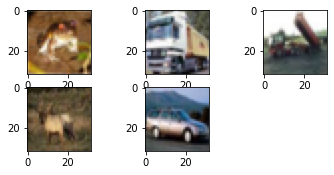

In [7]:
#Loading first 5 images
for i in range(5):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i])
# show the figure
plt.show()

### Preprocessing data

#### Normalization of input
- The i/p values of our data are pixels i.e. they have a range of 0 to 255. the wide range of data can negatively impact the model's performance. 
- Hence, we normalise it by dividing by 255 and also use 32 bit precision to scale it in a range of 0.0 to 1.0

In [8]:
#astype method of numpy converts it to 32 bit float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0


#### One hot encoding of output
- We are performing multiclass classification where out output has 10 categories.
- np_utils from keras contains to_categorical() method that converts array of labelled data to one-hot-vector

In [9]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

### Designing the model

###### CONVOLUTIONAL LAYER
- This is the first layer that takes inputs and runs convolutional filters
- In Keras implementation, we specify the no. of channels/filters and size of the filter. (32,(3,3))
- ReLU activation function is used i.e max(0,z)
- padding="same" implies no change in image size at all

- Dropout Layer is added to prevent overfitting(Note: verified by testing without it and with it)
- It functions by randomly removing some of the connections b/w the layers(here, 20%)

- Batch normalisation normalises the i/p heading to next layer so that the network always creates activation with the same distribution


In [10]:
model = keras.Sequential()
model.add(Conv2D(32,(3,3), 
                 activation='relu',
                 input_shape=(32, 32, 3),
                 padding='same'
                ))
model.add(Dropout(0.2))
model.add(BatchNormalization())



##### Another convolutional layer with increased filter size for the network to learn more complex representations.
- Pooling layer makes the classifier more robust so that it learns more relevant patterns

In [11]:
model.add(Conv2D(64,(3,3),
                activation = 'relu',
                padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())


In [12]:
# Repeating the same

model.add(Conv2D(64,(3,3),
                activation = 'relu',
                padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
# Increasing filter size
model.add(Conv2D(128,(3,3),
                activation = 'relu',
                padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [13]:
#Flattening the data i.e. converting its dimension
model.add(Flatten())
model.add(Dropout(0.2))

#### ------
- We create the first densely connected layer and specify the no. of neurons
- The no. of neurons decreases with succeeding layers thus eventually approaching to no. of o/p classes(here, 10)
- The kernel constraint regularizes the data as it learns and prevents overfitting

In [14]:
model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(128, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

#### The FINAL Layer
- here, we pass in the no of classes for no of neurons where each neuron represents a class.
- The o/p of this layer will be a 10 neuron vector where each neuron holds a probability value of the corresponding class
- Lastly the softmax activation function selects the neuron with the highest probability as its output implying that the image belongs to the class


In [15]:
model.add(Dense(class_num))
model.add(Activation('softmax'))

### Compiling the model
- Optimiser is what tunes the weights in the network to aproach the point of lowest loss(global minima)
- Loss function is specified as categorical cross entropy(type of log loss)
- Epoch is the no. of iterations for which the neural network will train


In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Training the model

In [17]:
np.random.seed(seed)
print(y_train.shape, y_test.shape)
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=25,batch_size=64)

(50000, 10) (10000, 10)
Epoch 1/25
782/782 [==============================] - 41s 11ms/step - loss: 1.6228 - accuracy: 0.4193 - val_loss: 1.4791 - val_accuracy: 0.4834
Epoch 2/25
782/782 [==============================] - 8s 10ms/step - loss: 1.1454 - accuracy: 0.5886 - val_loss: 0.9651 - val_accuracy: 0.6502
Epoch 3/25
782/782 [==============================] - 8s 10ms/step - loss: 0.9471 - accuracy: 0.6663 - val_loss: 0.8549 - val_accuracy: 0.6925
Epoch 4/25
782/782 [==============================] - 8s 10ms/step - loss: 0.8420 - accuracy: 0.7067 - val_loss: 0.7266 - val_accuracy: 0.7492
Epoch 5/25
782/782 [==============================] - 8s 10ms/step - loss: 0.7643 - accuracy: 0.7329 - val_loss: 0.7357 - val_accuracy: 0.7453
Epoch 6/25
782/782 [==============================] - 8s 10ms/step - loss: 0.7121 - accuracy: 0.7504 - val_loss: 0.6444 - val_accuracy: 0.7759
Epoch 7/25
782/782 [==============================] - 8s 10ms/step - loss: 0.6722 - accuracy: 0.7654 - val_loss: 0.63

#### NOTE:
Generally, we have a validation set that is different from the testing set.
A percentage of training set is used for the same
In this case, we'll just pass in the test data in order to keep things simple



### Evaluating the model

In [18]:
score = model.evaluate(X_test,y_test,verbose=0)
print("ACCURACY: ",score[1]*100)

ACCURACY:  83.59000086784363


In [19]:
#Summary of the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 32, 32, 32)        896       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 32, 32, 32)        0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 32, 32, 32)        128       
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 32, 32, 64)        18496     
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 16, 16, 64)        0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 16, 16, 64)        0         
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 16, 16, 64)        2

### Performance visualisation

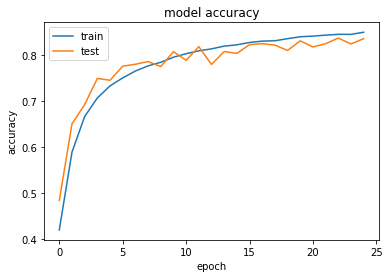

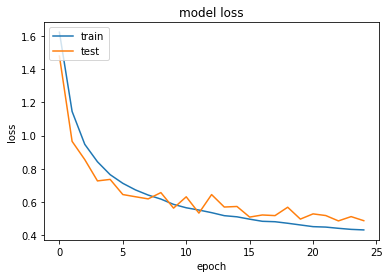

In [20]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Data Augmentation
- Data augmentation means making copies of the examples in the training dataset with small random modifications.
- This has a regularizing effect as it both expands the training dataset and allows the model to learn the same general features, although in a more generalized manner.
- The  random augmentations used here include a horizontal flip, minor shifts of the image.
- Image Data Generator class from keras is used for the same.

In [21]:
from keras.preprocessing.image import ImageDataGenerator

In [32]:
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator1
it_train = datagen.flow(X_train, y_train, batch_size=64)
# fit model
steps = int(X_train.shape[0] / 64)



In [33]:
history = model.fit(it_train, steps_per_epoch=steps, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
781/781 [==============================] - 29s 38ms/step - loss: 0.5519 - accuracy: 0.8110 - val_loss: 0.4424 - val_accuracy: 0.8476
Epoch 2/25
781/781 [==============================] - 27s 34ms/step - loss: 0.5449 - accuracy: 0.8123 - val_loss: 0.4679 - val_accuracy: 0.8380
Epoch 3/25
781/781 [==============================] - 29s 37ms/step - loss: 0.5480 - accuracy: 0.8101 - val_loss: 0.4090 - val_accuracy: 0.8592
Epoch 4/25
781/781 [==============================] - 27s 34ms/step - loss: 0.5413 - accuracy: 0.8133 - val_loss: 0.5661 - val_accuracy: 0.8093
Epoch 5/25
781/781 [==============================] - 28s 36ms/step - loss: 0.5410 - accuracy: 0.8132 - val_loss: 0.4190 - val_accuracy: 0.8535
Epoch 6/25
781/781 [==============================] - 28s 36ms/step - loss: 0.5401 - accuracy: 0.8145 - val_loss: 0.4618 - val_accuracy: 0.8404
Epoch 7/25
781/781 [==============================] - 27s 34ms/step - loss: 0.5407 - accuracy: 0.8132 - val_loss: 0.4743 - val_accuracy:

In [34]:
score = model.evaluate(X_test,y_test,verbose=0)
print("ACCURACY: ",score[1]*100)

ACCURACY:  85.49000024795532


In [35]:
#=======SAMPLING======

y_predicted = model.predict(X_test)


In [36]:
#y_predicted is an array differing from y_test which has labels, thus we need to do its labelling
y_predicted_labels = np.array([ np.argmax(i) for i in y_predicted])
y_test_labels = np.array([ np.argmax(i) for i in y_test])


8

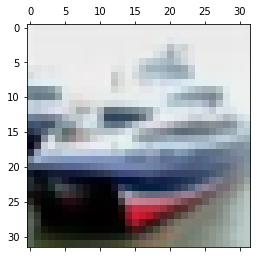

In [37]:
#verification
plt.matshow(X_test[1])
#Veirfied
np.argmax(y_predicted[1])#o/p is 8 which stands for ship class

### Performance visualisation

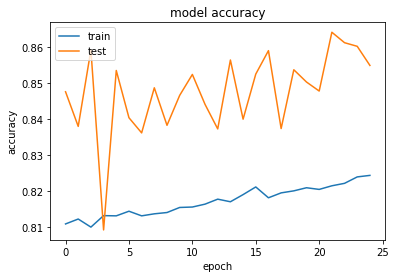

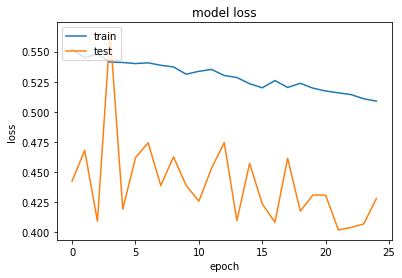

In [38]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



*   Though the accuracy has improved, we see a significant difference in loss and accuracy of training and testing sets.

*   Probabale reasons: small size of the images; need to redefine regularisation and other parameters to tune the model



### CONFUSION MATRIX


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_labels, y_predicted_labels)

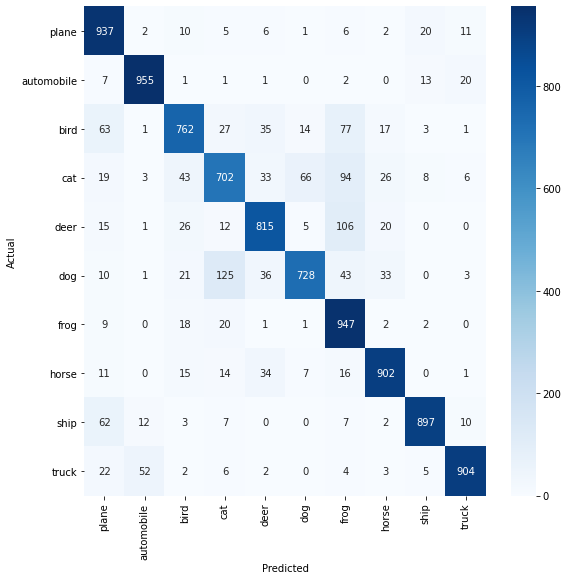

In [40]:
import seaborn as sn


labels=["plane", "automobile","bird" , "cat", "deer","dog", "frog", "horse", "ship", "truck"]
plt.figure(figsize=(9,9))
sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### OBSERVATION:
- The baseline model turned out to be overfit in nature. Hence, I added dropout layer and batch normalisation to regularise    it.
- The accuracy also improved by 4-5%.
- The accuracy turned out to be around 84-85% in the model where data augmentation was not performed
- After data augmentation, the accuracy improved to around 87%.
- Further regularisation like increasing dropout to 5% can improve the accuracy


### Conclusion:-
- I developed a baseline model for image classification and explored its extensions to improve learning and model capacity
- From there, we develop a finalized model, evaluate the performance of the final model, and can use it to make predictions on new images.

#### FURTHER IMPROVEMENT AREAS:

- Refined preprocessing like converting it to grayscale etc
-  Additional regularisation 
- Increasing epochs
-  Tuning hyperparameters such as learning rate,etc
-  Advanced extensions like Transfer Learning, use of RNN, etc.